# DESAFÍO: ANÁLISIS DE LOS DATOS OBTENIDOS EN EL QUIZ

En este cuaderno se analizan los datos obtenidos en el cuestionario de la aplicación. La intención es obtener una relación entre las personas que tienen mas o menos conocimientos sobre los efectos de las olas de calor.

<!-- #### Los datos en el DataFrame muestran información detallada sobre los usuarios logueados: -->
<!-- 
- La columna "fecha" contiene la fecha de logueo de cada usuario.
- La columna "nombre" muestra el nombre de cada usuario.
- "cp" representa el código postal del lugar de residencia del usuario.
- "edad" indica la fecha de nacimiento de cada usuario.
- "n_hijos_menores" muestra el número de hijos menores de cada usuario.
- "sexo" indica el género de cada usuario.
- "email" es la dirección de correo electrónico de cada usuario. -->

In [1]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta


# Rutas
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time

## Cargamos las tabla Usuarios

In [5]:
users = pd.read_csv('../data/users_login/users.csv')
users.head()

,fecha_registro,nombre,user_id,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,24-04-2023,Lynn Moore,655346,M,27-09-1954,28023,5,thomasgeorge@example.com
1,02-06-2023,Lisa Valenzuela,279526,H,28-10-1934,28037,2,kbarrera@example.net
2,20-03-2023,Matthew Marshall,797457,H,17-09-1946,28035,2,joshuawagner@example.com
3,03-02-2023,Ryan Rogers,803906,H,13-06-1936,28026,2,wweber@example.net
4,25-01-2023,Destiny Shaffer,314182,H,27-12-1961,28024,0,ericksonsandra@example.com


In [3]:
# Convertimos la columna 'fecha_nacimiento' a tipo datetime
users['fecha_nacimiento'] = pd.to_datetime(users['fecha_nacimiento'], format='%d-%m-%Y')
# users.head()

### Clasificamos los datos en grupos de edad para poder trabajar mejor 
    1. 18-24
    2. 25-44
    3. 45-65
    4. +65

In [4]:
# Le damos forma a la edad de los usuarios

# Convertimos la columna 'fecha_nacimiento' a tipo datetime
users['fecha_nacimiento'] = pd.to_datetime(users['fecha_nacimiento'], format='%d-%m-%Y')

fecha_hoy = datetime.today()
type(fecha_hoy)

users['edad'] = (fecha_hoy - users['fecha_nacimiento']).astype('<m8[Y]').astype(int)

# vamos a agrupar las edades en 4 grupos: 17-24, 25-44, 44-65 y +65.

for index, row in users.iterrows():
    if row['edad'] < 25:
        users.at[index, 'edad'] = 1
    elif 25 <= row['edad'] < 45:
        users.at[index, 'edad'] = 2
    elif 45 <= row['edad'] < 65:
        users.at[index, 'edad'] = 3
    else:
        users.at[index, 'edad'] = 4

# users.head()

## Cargamos los datos del Quiz

In [6]:
quiz = pd.read_csv('../data/quiz/answers.csv')
quiz.head()

,user_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total
0,655346,0,0,1,1,1,0,0,1,0,1,5
1,279526,1,1,0,1,0,1,1,1,0,1,7
2,797457,0,0,1,0,1,1,1,1,1,0,6
3,803906,0,1,1,1,1,1,1,0,1,1,8
4,314182,0,1,0,1,1,0,1,1,0,0,5


In [6]:
quiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  500 non-null    int64
 1   Q1       500 non-null    int64
 2   Q2       500 non-null    int64
 3   Q3       500 non-null    int64
 4   Q4       500 non-null    int64
 5   Q5       500 non-null    int64
 6   Q6       500 non-null    int64
 7   Q7       500 non-null    int64
 8   Q8       500 non-null    int64
 9   Q9       500 non-null    int64
 10  Q10      500 non-null    int64
 11  total    500 non-null    int64
dtypes: int64(12)
memory usage: 47.0 KB


## Unimos las dos tablas. Usuarios y resultados del cuestionario

In [7]:
df = pd.merge(users, quiz, on='user_id', how='outer')

In [8]:
# Vamos a considerar el 7 aprobado o suficiente y menos de 7 es que no tiene sufici3ntes conocimientos sobre el calor..
def aprobado_o_no(nota):
    return 1 if nota >= 7 else 0

df['aprobado'] = df['total'].apply(lambda nota: aprobado_o_no(nota))

In [9]:
# Tiene hijos, si/no
def hijos(numero_hijos):
    return 1 if numero_hijos > 0 else 0

df['hijos'] = df['n_hijos_menores'].apply(lambda numero_hijos: hijos(numero_hijos))

In [10]:
df.head()

,fecha_registro,nombre,user_id,sexo,fecha_nacimiento,cp,n_hijos_menores,email,edad,Q1,...,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,aprobado,hijos
0,24-04-2023,Lynn Moore,655346,M,1954-09-27,28023,5,thomasgeorge@example.com,4,0,...,1,1,0,0,1,0,1,5,0,1
1,02-06-2023,Lisa Valenzuela,279526,H,1934-10-28,28037,2,kbarrera@example.net,4,1,...,1,0,1,1,1,0,1,7,1,1
2,20-03-2023,Matthew Marshall,797457,H,1946-09-17,28035,2,joshuawagner@example.com,4,0,...,0,1,1,1,1,1,0,6,0,1
3,03-02-2023,Ryan Rogers,803906,H,1936-06-13,28026,2,wweber@example.net,4,0,...,1,1,1,1,0,1,1,8,1,1
4,25-01-2023,Destiny Shaffer,314182,H,1961-12-27,28024,0,ericksonsandra@example.com,3,0,...,1,1,0,1,1,0,0,5,0,0


In [11]:
# Eliminamos columnas que tienen menos utilidad para analizar como; nombre, email.
df.drop(['nombre'],axis=1,inplace=True)
df.drop(['email'],axis=1,inplace=True)
df.drop(['fecha_nacimiento'],axis=1,inplace=True)
df.drop(['user_id'],axis=1,inplace=True)
df.drop(['n_hijos_menores'],axis=1,inplace=True)

### Ahora tenemos un df mas reducido

In [12]:
df.head()

,fecha_registro,sexo,cp,edad,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,aprobado,hijos
0,24-04-2023,M,28023,4,0,0,1,1,1,0,0,1,0,1,5,0,1
1,02-06-2023,H,28037,4,1,1,0,1,0,1,1,1,0,1,7,1,1
2,20-03-2023,H,28035,4,0,0,1,0,1,1,1,1,1,0,6,0,1
3,03-02-2023,H,28026,4,0,1,1,1,1,1,1,0,1,1,8,1,1
4,25-01-2023,H,28024,3,0,1,0,1,1,0,1,1,0,0,5,0,0


# Visualizacion

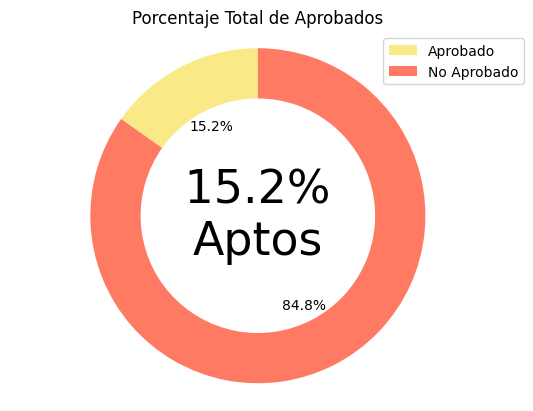

In [13]:
# vamos a calcular el porcentaje de personas que aprueban y suspenden el examen

df_apto_sum = df['aprobado'].sum()
df_apto_count = df['aprobado'].count()
porc_apto = (df_apto_sum/df_apto_count)*100
porc_no_aptos = 100 - porc_apto
porcentajes = [porc_apto, porc_no_aptos]

# Colores para el gráfico
colores = ['#FAEA87','#FF7A62']

# Crear la figura y el eje
fig, ax = plt.subplots()
etiquetas = ['Aprobado', 'No Aprobado']
# Crear el gráfico de donut chart
_, texto, _ = ax.pie(porcentajes,  colors=colores, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Personalizar el texto en el centro del donut chart
# for t in texto:
#     t.set_text(t.get_text() + "\n" + f"{porcentajes[texto.index(t)]:.1f} %")

# Añadir un círculo blanco en el centro para convertir el pie chart en donut chart
circulo_central = plt.Circle((0, 0), 0.2, color='white')
ax.add_artist(circulo_central)

# Mostramos el total en el centro del gráfico
ax.text(0, 0, f' {porc_apto}% \nAptos', ha='center', va='center', fontsize=33)
plt.legend(labels=etiquetas, loc='upper right', bbox_to_anchor=(1.05, 1))
# Ajustar el aspecto para que el donut chart sea un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.title('Porcentaje Total de Aprobados')
plt.show()

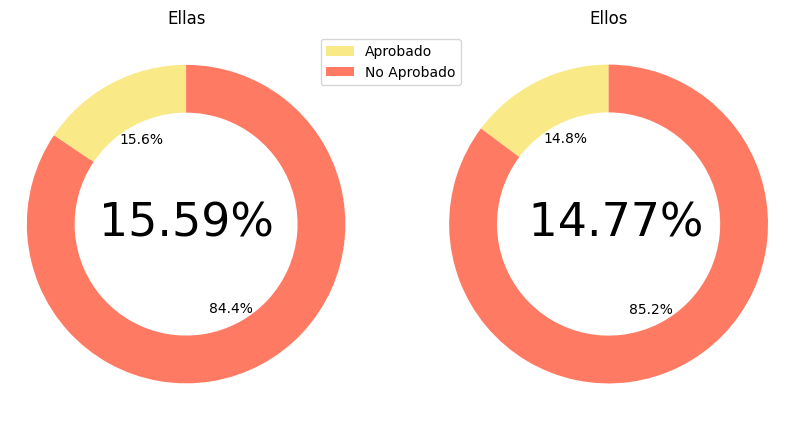

In [14]:
df_mujer = df[df['sexo'] == 'M']
df_hombre = df[df['sexo'] == 'H']

df_m_apto_sum = df_mujer['aprobado'].sum()
df_m_apto_count = df_mujer['aprobado'].count()
porc_apto_m = ((df_m_apto_sum/df_m_apto_count)*100).round(2)
porc_no_aptos_m = 100 - porc_apto_m
porcentajes_m = [porc_apto_m, porc_no_aptos_m]

df_apto_sum_h = df_hombre['aprobado'].sum()
df_apto_count_h = df_hombre['aprobado'].count()
porc_apto_h = ((df_apto_sum_h/df_apto_count_h)*100).round(2)
porc_no_aptos_h = 100 - porc_apto_h
porcentajes_h = [porc_apto_h, porc_no_aptos_h]

colores_aprobados = ['#FAEA87', '#FF7A62']
colores_no_aprobados = ['#FAEA87', '#FF7A62']

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Primer donut chart (aprobados)
porcentajes_aprobados = porcentajes_m
# etiquetas_aprobados = ['Aprobadas', 'No Aprobadas']
_, texto_aprobados, _ = axs[0].pie(porcentajes_aprobados, colors=colores_aprobados, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# for t in texto_aprobados:
#     t.set_text(t.get_text() + "\n" + f"{porcentajes_aprobados[texto_aprobados.index(t)]:.1f} %")
circulo_central_aprobados = plt.Circle((0, 0), 0.2, color='white')
axs[0].add_artist(circulo_central_aprobados)
df_mujer = df[df['sexo'] == 'M']
axs[0].set_title('Ellas')
# Mostramos el total en el centro del gráfico
axs[0].text(0, 0, f'{porc_apto_m}%', ha='center', va='center', fontsize=33)
# etiquetas = ['Aprobado', 'No Aprobado']


# Segundo donut chart (no aprobados)
porcentajes_no_aprobados = porcentajes_h
# etiquetas_no_aprobados = ['No Aprobados', 'Aprobados']
_, texto_no_aprobados, _ = axs[1].pie(porcentajes_no_aprobados, colors=colores_no_aprobados, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# for t in texto_no_aprobados:
#     t.set_text(t.get_text() + "\n" + f"{porcentajes_no_aprobados[texto_no_aprobados.index(t)]:.1f} %")
circulo_central_no_aprobados = plt.Circle((0, 0), 0.2, color='white')
axs[1].add_artist(circulo_central_no_aprobados)
axs[1].set_title('Ellos')
axs[1].text(0, 0, f' {porc_apto_h}%', ha='center', va='center', fontsize=33)


plt.legend(labels=etiquetas, loc='upper right', bbox_to_anchor=(0.1, 1))

# Ajustar el aspecto para que los donut charts sean círculos
for ax in axs:
    ax.axis('equal')

# Mostrar la figura con ambos donut charts
plt.show()

In [15]:
# tabla pivot con los porcentajes de aprobados según el rango de edad y el sexo
aptos_sexo_edad = pd.pivot_table(df, index='sexo', columns='edad', values='aprobado', aggfunc='mean')
# aptos_sexo_edad['total'] = aptos_sexo_edad.mean(axis=1)
aptos_sexo_edad

edad,1,2,3,4
sexo,,,,
H,0.240000,0.125000,0.148148,0.137255
M,0.181818,0.130435,0.142857,0.172414


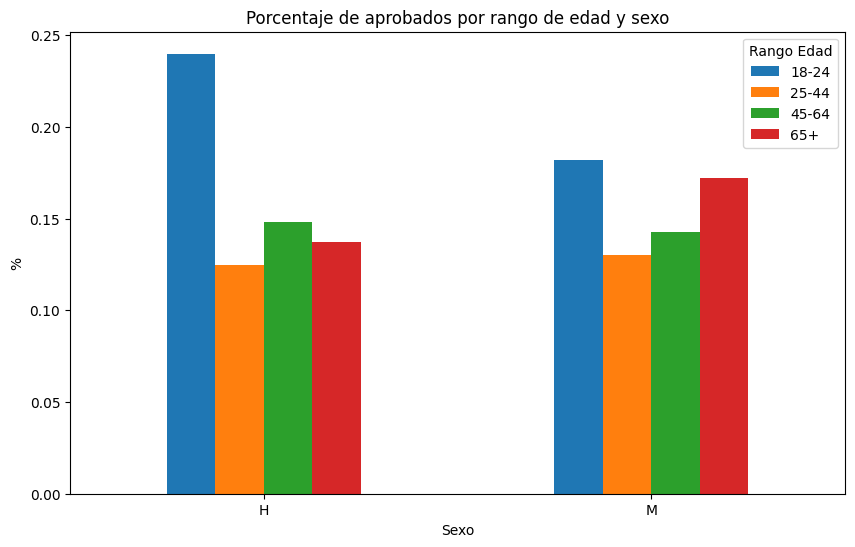

In [16]:
aptos_sexo_edad.plot(kind='bar', rot=0, figsize=(10, 6))
plt.xlabel('Sexo')
plt.ylabel('%')
plt.title('Porcentaje de aprobados por rango de edad y sexo')
plt.legend(title='Rango Edad')

custom_palette = {0: "#6DCFDE", 1: "#7FD64E", 2: "#FFD024", 3: "#DF0000"}
etiquetas_franjas = ['18-24', '25-44', '45-64', '65+']
# handles, _ = fig2.get_legend_handles_labels()
plt.legend(title='Rango Edad',labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.0, 1))

plt.show()

In [15]:
# Filtrar el DataFrame para obtener solo las filas donde 'columna2' sea igual a 1
df[df['sexo'] == 'M']
# nuevos_datos = df[filtro]

# Contar cuántos valores iguales a 1 hay en la columna 'columna1' de los datos filtrados
conteo = df[df['sexo'] == 'M']['Q1'].sum()
conteo
# # Mostrar el resultado
# print(conteo)

135

In [16]:
df_sexo = df.groupby('sexo').sum()

In [17]:
df_sexo.drop('cp',axis=1,inplace=True)
df_sexo.drop('aprobado',axis=1,inplace=True)
df_sexo.drop('hijos',axis=1,inplace=True)
df_sexo.drop('edad',axis=1,inplace=True)


In [18]:
df_sexo

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total
sexo,,,,,,,,,,,
H,109,111,108,115,127,118,119,113,120,110,1150
M,135,134,134,117,134,122,132,120,115,130,1273


In [19]:
df.head()

,fecha_registro,sexo,cp,edad,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,total,aprobado,hijos
0,24-04-2023,M,28023,4,0,0,1,1,1,0,0,1,0,1,5,0,1
1,02-06-2023,H,28037,4,1,1,0,1,0,1,1,1,0,1,7,1,1
2,20-03-2023,H,28035,4,0,0,1,0,1,1,1,1,1,0,6,0,1
3,03-02-2023,H,28026,4,0,1,1,1,1,1,1,0,1,1,8,1,1
4,25-01-2023,H,28024,3,0,1,0,1,1,0,1,1,0,0,5,0,0


In [20]:
mujeres = {"1" : (df[df['sexo'] == 'M']['Q1'].sum())/(df[df['sexo'] == 'M']['Q1'].count()),
           "2": (df[df['sexo'] == 'M']['Q2'].sum())/(df[df['sexo'] == 'M']['Q2'].count()),
           "3": (df[df['sexo'] == 'M']['Q3'].sum())/(df[df['sexo'] == 'M']['Q3'].count()),
           "4":(df[df['sexo'] == 'M']['Q4'].sum())/(df[df['sexo'] == 'M']['Q4'].count()),
           "5":(df[df['sexo'] == 'M']['Q5'].sum())/(df[df['sexo'] == 'M']['Q5'].count()),
         "6":(df[df['sexo'] == 'M']['Q6'].sum())/(df[df['sexo'] == 'M']['Q6'].count()),
         "7":  (df[df['sexo'] == 'M']['Q7'].sum())/(df[df['sexo'] == 'M']['Q7'].count()),
         "8":  (df[df['sexo'] == 'M']['Q8'].sum())/(df[df['sexo'] == 'M']['Q8'].count()),
         "9":  (df[df['sexo'] == 'M']['Q9'].sum())/(df[df['sexo'] == 'M']['Q9'].count()),
         "10":  (df[df['sexo'] == 'M']['Q10'].sum())/(df[df['sexo'] == 'M']['Q10'].count())
           
           }

print(mujeres)

{'1': 0.5133079847908745, '2': 0.5095057034220533, '3': 0.5095057034220533, '4': 0.4448669201520912, '5': 0.5095057034220533, '6': 0.46387832699619774, '7': 0.5019011406844106, '8': 0.45627376425855515, '9': 0.4372623574144487, '10': 0.49429657794676807}


In [21]:
hombres = {"1" : (df[df['sexo'] == 'H']['Q1'].sum())/(df[df['sexo'] == 'H']['Q1'].count()),
           "2": (df[df['sexo'] == 'H']['Q2'].sum())/(df[df['sexo'] == 'H']['Q2'].count()),
           "3": (df[df['sexo'] == 'H']['Q3'].sum())/(df[df['sexo'] == 'H']['Q3'].count()),
           "4":(df[df['sexo'] == 'H']['Q4'].sum())/(df[df['sexo'] == 'H']['Q4'].count()),
           "5":(df[df['sexo'] == 'H']['Q5'].sum())/(df[df['sexo'] == 'H']['Q5'].count()),
         "6":(df[df['sexo'] == 'H']['Q6'].sum())/(df[df['sexo'] == 'H']['Q6'].count()),
         "7":  (df[df['sexo'] == 'H']['Q7'].sum())/(df[df['sexo'] == 'H']['Q7'].count()),
         "8":  (df[df['sexo'] == 'H']['Q8'].sum())/(df[df['sexo'] == 'H']['Q8'].count()),
         "9":  (df[df['sexo'] == 'H']['Q9'].sum())/(df[df['sexo'] == 'H']['Q9'].count()),
         "10":  (df[df['sexo'] == 'H']['Q10'].sum())/(df[df['sexo'] == 'H']['Q10'].count())
           
           }

print(hombres)

{'1': 0.459915611814346, '2': 0.46835443037974683, '3': 0.45569620253164556, '4': 0.48523206751054854, '5': 0.5358649789029536, '6': 0.4978902953586498, '7': 0.5021097046413502, '8': 0.4767932489451477, '9': 0.5063291139240507, '10': 0.4641350210970464}


In [29]:
(df[df['sexo'] == 'M']['Q3'].sum())/(df[df['sexo'] == 'M']['Q3'].count())

0.5095057034220533

In [58]:
(df[df['sexo'] == 'M']['Q2'].sum())/(df[df['sexo'] == 'M']['Q2'].count())

0.5095057034220533

In [57]:
(df[df['sexo'] == 'M']['Q4'].sum())/(df[df['sexo'] == 'M']['Q4'].count())

0.4448669201520912

In [27]:

# Calcular la suma de 'Q1 = 1' y el total de filas en 'Q1' para obtener el porcentaje
p_Q1 = df['Q1'].sum() / len(df)
p_Q2 = df['Q2'].sum() / len(df)
p_Q3 = df['Q3'].sum() / len(df)
p_Q4 = df['Q4'].sum() / len(df)
p_Q5 = df['Q5'].sum() / len(df)
p_Q6 = df['Q6'].sum() / len(df)
p_Q7 = df['Q7'].sum() / len(df)
p_Q8 = df['Q8'].sum() / len(df)
p_Q9 = df['Q9'].sum() / len(df)
p_Q10 = df['Q10'].sum() / len(df)

df_aptos_100 = pd.DataFrame({
    'Q1': [p_Q1],
    'Q2': [porcentaje_Q2],
    'Q3': [porcentaje_Q3],
    # y así sucesivamente para cada columna 'Q'
})

# Mostrar el nuevo DataFrame con los porcentajes
nuevo_df

,Q1,Q2,Q3
0,0.488,0.49,0.484
